In [20]:
import os
import shutil

In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [67]:
dataDir='..'
dataSubType='train2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataSubType)

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=13.69s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor food indoor appliance sports person animal vehicle furniture accessory electronic kitchen


In [10]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['clock']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(len(imgIds))

3159


In [15]:
img = coco.loadImgs(imgIds[0])[0]
img

{u'coco_url': u'http://images.cocodataset.org/train2014/COCO_train2014_000000106498.jpg',
 u'date_captured': u'2013-11-24 15:30:09',
 u'file_name': u'COCO_train2014_000000106498.jpg',
 u'flickr_url': u'http://farm9.staticflickr.com/8324/8082281463_dbc1e19daa_z.jpg',
 u'height': 640,
 u'id': 106498,
 u'license': 1,
 u'width': 425}

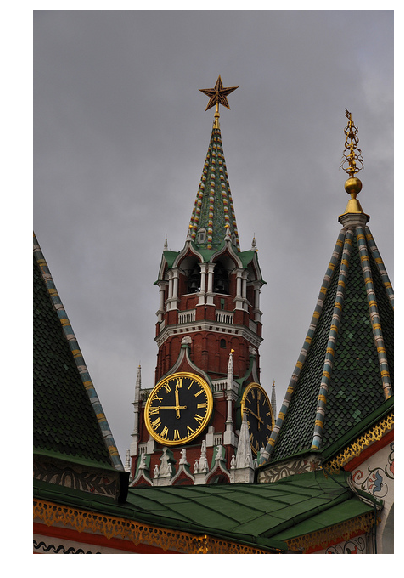

In [16]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [21]:
# put all clocks into another folder
source_folder = '%s/images/%s/'%(dataDir,dataType)
raw_clock_folder = '%s/images/%s/'%(dataDir,'raw_clock')
if not os.path.exists(raw_clock_folder):
    os.mkdir(raw_clock_folder)
catIds = coco.getCatIds(catNms=['clock']);
imgIds = coco.getImgIds(catIds=catIds );
for img_meta in coco.loadImgs(imgIds):
    src_file_path = os.path.join(source_folder, img_meta['file_name'])
    dst_file_path = os.path.join(raw_clock_folder, img_meta['file_name'])
    shutil.copyfile(src_file_path, dst_file_path)

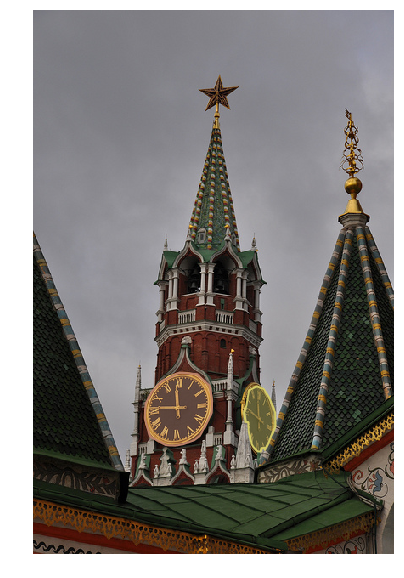

In [22]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

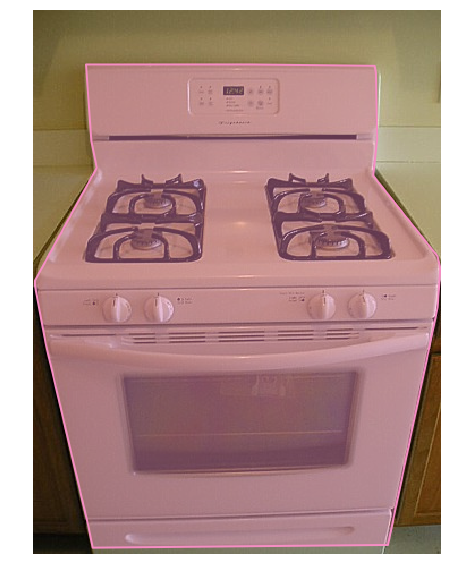

In [73]:
def display_img_anno(img_id):
    img = coco.loadImgs(img_id)[0]
    I = io.imread('%s/images/%s/%s'%(dataDir,dataSubType,img['file_name']))
    catIds = coco.getCatIds();
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
display_img_anno(57586)

In [24]:
anns

[{u'area': 5322.010549999999,
  u'bbox': [130.96, 425.97, 79.34, 86.21],
  u'category_id': 85,
  u'id': 336006,
  u'image_id': 106498,
  u'iscrowd': 0,
  u'segmentation': [[156.35,
    511.65,
    137.31,
    501.6,
    130.96,
    479.92,
    132.02,
    462.46,
    139.43,
    448.71,
    150.53,
    436.55,
    163.23,
    430.2,
    171.69,
    425.97,
    192.84,
    428.08,
    207.65,
    441.84,
    210.3,
    459.82,
    209.77,
    473.57,
    201.83,
    489.96,
    195.49,
    501.07,
    188.08,
    506.36,
    175.39,
    510.59,
    166.93,
    512.18]]},
 {u'area': 1980.7243500000006,
  u'bbox': [247.9, 442.28, 37.01, 76.83],
  u'category_id': 85,
  u'id': 337425,
  u'image_id': 106498,
  u'iscrowd': 0,
  u'segmentation': [[250.63,
    464.58,
    253.93,
    446.82,
    263.02,
    442.28,
    271.28,
    445.58,
    279.13,
    458.8,
    284.49,
    473.26,
    284.91,
    489.36,
    276.23,
    509.87,
    272.57,
    517.21,
    272.21,
    514.95,
    268.53,
   

In [1]:
from vqaTools.vqa import VQA
import random
import skimage.io as io
import matplotlib.pyplot as plt
import os

In [5]:
dataDir		='..'
versionType ='v2_' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0.
dataSubType ='test2015'
qannFile     ='%s/Question_Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, dataType, dataSubType)
quesFile    ='%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, taskType, dataType, dataSubType)
imgDir 		= '%s/images/%s/' %(dataDir, dataSubType)
vqa=VQA(qannFile, quesFile)

loading VQA annotations and questions into memory...


IOError: [Errno 2] No such file or directory: '../Question_Annotations/v2_mscoco_test2015_annotations.json'

Question: What time does the clock show?
Answer 1: 11:05
Answer 2: 11:05
Answer 3: 11:05
Answer 4: 1:55
Answer 5: 11:00
Answer 6: 12:50
Answer 7: 1:55
Answer 8: 11:05
Answer 9: 11:05
Answer 10: 11:05


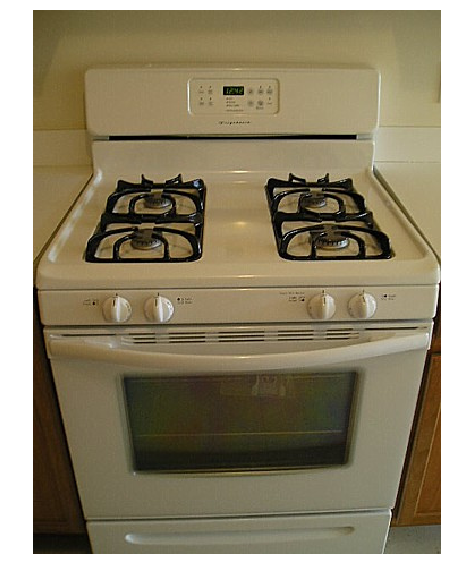

In [74]:
# load and display QA annotations for what time
annIds = vqa.getQuesIds(quesTypes='what time', ansTypes='number');
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
# imgId = randomAnn['image_id']
imgId = 57586
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
    I = io.imread(imgDir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

In [57]:
# put all clocks into another folder
source_folder = '%s/images/%s/'%(dataDir,dataSubType)
raw_clock_folder = '%s/images/%s/'%(dataDir,'raw_clock_vqa')
if not os.path.exists(raw_clock_folder):
    os.mkdir(raw_clock_folder)
annIds = vqa.getQuesIds(quesTypes='what time', ansTypes='number');
anns = vqa.loadQA(annIds)
for ann in anns:
    img_file_path = 'COCO_' + dataSubType + '_'+ str(ann['image_id']).zfill(12) + '.jpg'
    src_file_path = os.path.join(source_folder, img_file_path)
    dst_file_path = os.path.join(raw_clock_folder, img_file_path)
    shutil.copyfile(src_file_path, dst_file_path)

In [63]:
clock_vqa = {ann['image_id'] for ann in anns}
print(len(clock_vqa))
print(len(imgIds))
print(len(clock_vqa & set(imgIds)))
print(clock_vqa - set(imgIds))

1233
3159
1158
set([34816, 136704, 527748, 67798, 351622, 24712, 115465, 388311, 419980, 101646, 293520, 339089, 450066, 177974, 385172, 219544, 45337, 272026, 143392, 485025, 43227, 573988, 231206, 88871, 576040, 473642, 337325, 342702, 7855, 330376, 331954, 580979, 406709, 164534, 500921, 86842, 505661, 533182, 507680, 273600, 201632, 319115, 144246, 407373, 466277, 363464, 250569, 53196, 381261, 496847, 548689, 16468, 195797, 514006, 577623, 420442, 256731, 217436, 310751, 514531, 63974, 301158, 267880, 392170, 464875, 405997, 557678, 169640, 57586, 426355, 68212, 12556, 114225, 464744, 87509])


In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


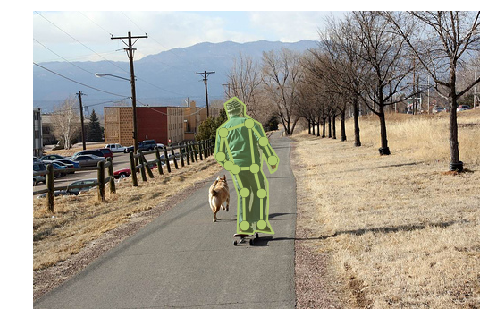

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


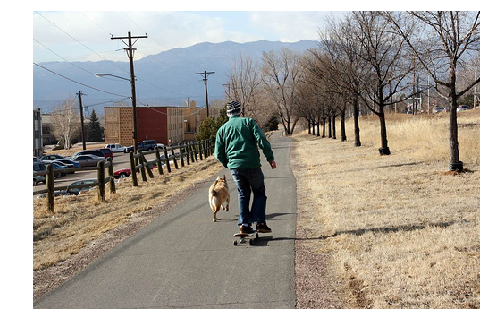

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [9]:
import json
dataDir		='..'
versionType ='v2_' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0.
dataSubType ='test2015'
qannFile     ='%s/Question_Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, dataType, dataSubType)
quesFile    ='%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, taskType, dataType, dataSubType)
questions = json.load(open(quesFile, 'r'))

In [15]:
coarse = [ques for ques in questions['questions'] 
 if ques['question'].startswith('What time') 
 and 'day' not in ques['question'] and 'year' not in ques['question']]
fine = [ques for ques in questions['questions'] 
 if 'clock' in ques['question']]

In [19]:
# put all clocks into another folder
import os
import shutil

source_folder = '%s/images/%s/'%(dataDir,dataSubType)
raw_clock_folder = '%s/images/%s/'%(dataDir,'test_fine_clock_vqa')
if not os.path.exists(raw_clock_folder):
    os.mkdir(raw_clock_folder)
# annIds = vqa.getQuesIds(quesTypes='what time', ansTypes='number');
# anns = vqa.loadQA(annIds)
for ann in fine:
    img_file_path = 'COCO_' + dataSubType + '_'+ str(ann['image_id']).zfill(12) + '.jpg'
    src_file_path = os.path.join(source_folder, img_file_path)
    dst_file_path = os.path.join(raw_clock_folder, img_file_path)
    shutil.copyfile(src_file_path, dst_file_path)